In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import ListedColormap
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns
from pprint import pprint
from glob import glob

#path for combined and clean .csv
output_data_file = "cleaned_articles.csv"

#use glob function to get a list of all resource .csv files
article_files = sorted(glob('new resources/project*.csv'))

article_files



['new resources\\project-blacklivesmatter.csv',
 'new resources\\project-covid.csv',
 'new resources\\project-education.csv',
 'new resources\\project-entertainment.csv',
 'new resources\\project-fitness.csv',
 'new resources\\project-food.csv',
 'new resources\\project-health.csv',
 'new resources\\project-politics.csv',
 'new resources\\project-science.csv',
 'new resources\\project-sports.csv',
 'new resources\\project-technology.csv',
 'new resources\\project-trump.csv']

In [3]:
#concatinate all of the files in the list and add a column named filename to categorize the rows
articles_df = pd.concat((pd.read_csv(file).assign(filename=file) for file in article_files), ignore_index=True)

articles_df

,title,url,evergreen_score,evergreen_score2,total_shares,total_facebook_shares,twitter_shares,pinterest_shares,total_reddit_engagements,published_date,...,facebook_shares,facebook_likes,num_linking_domains,wow_count,love_count,haha_count,sad_count,angry_count,filename,gtitle
0,D.C. Mayor Bowser has 'Black Lives Matter' pai...,https://www.nbcnews.com/politics/politics-news...,2.639445,2.639445,13333377,13300726,20505,149,11997,2020-06-05,...,1389988,10646102,115.0,6253.0,124745.0,4425.0,865.0,7038.0,new resources\project-blacklivesmatter.csv,NaN
1,"George Floyd death: 3 cops charged, Derek Chau...",https://www.cnbc.com/2020/06/03/3-more-cops-ch...,20.932731,20.932731,5792444,5786490,4743,20,1191,2020-06-03,...,819430,4390176,110.0,851.0,31095.0,411.0,657.0,1065.0,new resources\project-blacklivesmatter.csv,NaN
2,"America United: 'Church of God' group sings ""B...",https://www.youtube.com/watch?v=Qud7ptrxOVg,3.060189,3.060189,4327759,4327074,683,2,0,2020-05-30,...,589867,3452387,2.0,705.0,13891.0,41.0,86.0,13.0,new resources\project-blacklivesmatter.csv,NaN
3,Police Union Boss: 'Stop Treating Us Like Anim...,https://cnsnews.com/article/national/michael-w...,0.414509,0.414509,4060095,4058825,1220,7,43,2020-06-09,...,375563,2717403,10.0,631.0,16652.0,5033.0,822.0,1140.0,new resources\project-blacklivesmatter.csv,NaN
4,"Will Smith, Va., police chief, says rioters bl...",https://www.washingtontimes.com/news/2020/jun/...,16.801295,16.801295,3992863,3987493,5238,5,127,2020-06-02,...,631078,2717016,14.0,947.0,136.0,132.0,20898.0,42810.0,new resources\project-blacklivesmatter.csv,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119944,Michigan GOP mayor who backed Trump in 2016 wi...,https://www.cnn.com/2020/03/10/politics/michig...,5.271560,5.271560,13812,12144,1526,0,142,2020-03-10,...,953,8635,5.0,19.0,313.0,57.0,5.0,15.0,new resources\project-trump.csv,NaN
119945,Swalwell calls out Trump after video of presid...,https://thehill.com/homenews/house/481255-swal...,4.748605,4.748605,13811,10594,1434,3,1780,2020-02-03,...,1451,6364,8.0,79.0,246.0,352.0,71.0,175.0,new resources\project-trump.csv,NaN
119946,Safety measures in place for Phoenix Trump ral...,https://www.azfamily.com/news/safety-measures-...,0.121914,0.121914,13811,13810,1,0,0,2020-06-22,...,154,11140,1.0,17.0,11.0,187.0,5.0,1358.0,new resources\project-trump.csv,NaN
119947,Donald Trump's impeachment trial: What we've l...,https://www.cnn.com/2020/02/01/politics/impeac...,11.539602,11.539602,13809,12979,766,16,48,2020-02-01,...,2331,5484,28.0,14.0,26.0,84.0,80.0,343.0,new resources\project-trump.csv,NaN


In [ ]:
#analysis data files
#trump_data = "new resources/trump-buzzsumo-07-16-2020.csv"
#blm_data = "new resources/blacklivesmatter-buzzsumo-07-16-2020.csv"
#covid_data = "new resources/covid-buzzsumo-07-16-2020.csv"
#education_data = "new resources/education-buzzsumo-07-16-2020.csv"
#entertainment_data = "new resources/entertainment-buzzsumo-07-16-2020.csv"
#fitness_data = "new resources/fitness-buzzsumo-07-16-2020.csv"
#food_data = "new resources/food-buzzsumo-07-16-2020.csv"
#health_data = "new resources/health-buzzsumo-07-16-2020.csv"
#politics_data = "new resources/politics-buzzsumo-07-16-2020.csv"
#science_data = "new resources/science-buzzsumo-07-16-2020.csv"
#sports_data = "new resources/sports-buzzsumo-07-16-2020.csv"
#technology_data = "new resources/technology-buzzsumo-07-16-2020.csv"

#create initial dataframes from reading .csv files in
#trump_df = pd.read_csv(trump_data)
#blm_df = pd.read_csv(blm_data)
#covid_df = pd.read_csv(covid_data) 
#education_df = pd.read_csv(education_data)
#entertainment_df = pd.read_csv(entertainment_data)
#fitness_df = pd.read_csv(fitness_data)
#food_df = pd.read_csv(food_data)
#health_df = pd.read_csv(health_data)
#politics_df = pd.read_csv(politics_data)
#science_df = pd.read_csv(science_data)
#sports_df = pd.read_csv(sports_data)
#technology_data = pd.read_csv(technology_data)

In [5]:
#remove unneeded columns from combined dataframe

#clean trump dataframe
articles_df = articles_df[['title', 'url', 'evergreen_score',
                        'total_facebook_shares', 'facebook_comments',
                        'facebook_shares', 'facebook_likes',
                        'wow_count', 'love_count', 'haha_count', 'sad_count', 'angry_count', 'filename']]

#fill any null values with zero
articles_df.fillna(0)

#export cleaned data to a .csv file
articles_df.to_csv(output_data_file, index=False, header=True)


articles_df

#code commented out from longer was to combine files
    #clean blm dataframe and merge it with trump
    #blm_df = blm_df[['title', 'evergreen_score',
    #                    'total_facebook_shares', 'facebook_comments',
    #                    'facebook_shares', 'facebook_likes',
    #                    'wow_count', 'love_count', 'haha_count', 'sad_count', 'angry_count' ]]

    #blm_df['category'] = 'blm'

    #print(blm_df)

    #clean covid dataframe and merge it with trump
    #covid_df = covid_df[['title', 'evergreen_score',
    #                   'total_facebook_shares', 'facebook_comments',
    #                   'facebook_shares', 'facebook_likes',
    #                   'wow_count', 'love_count', 'haha_count', 'sad_count', 'angry_count' ]]

    #covid_df['category'] = 'covid'


    #print(covid_df)

    #clean covid dataframe and merge it with trump
    #education_df = covid_df[['title', 'evergreen_score',
    #                    'total_facebook_shares', 'facebook_comments',
    #                    'facebook_shares', 'facebook_likes',
    #                    'wow_count', 'love_count', 'haha_count', 'sad_count', 'angry_count' ]]

    #covid_df['category'] = 'covid'
    
    #original longer code for combining files
    #combine the category dataframes into one dataframe for analysis
    #list_of_dfs = [trump_df, blm_df, covid_df]


    #result_df = pd.concat(list_of_dfs, ignore_index = True)


,title,url,evergreen_score,total_facebook_shares,facebook_comments,facebook_shares,facebook_likes,wow_count,love_count,haha_count,sad_count,angry_count,filename
0,D.C. Mayor Bowser has 'Black Lives Matter' pai...,https://www.nbcnews.com/politics/politics-news...,2.639445,13300726,1264636,1389988,10646102,6253.0,124745.0,4425.0,865.0,7038.0,new resources\project-blacklivesmatter.csv
1,"George Floyd death: 3 cops charged, Derek Chau...",https://www.cnbc.com/2020/06/03/3-more-cops-ch...,20.932731,5786490,576884,819430,4390176,851.0,31095.0,411.0,657.0,1065.0,new resources\project-blacklivesmatter.csv
2,"America United: 'Church of God' group sings ""B...",https://www.youtube.com/watch?v=Qud7ptrxOVg,3.060189,4327074,284820,589867,3452387,705.0,13891.0,41.0,86.0,13.0,new resources\project-blacklivesmatter.csv
3,Police Union Boss: 'Stop Treating Us Like Anim...,https://cnsnews.com/article/national/michael-w...,0.414509,4058825,965859,375563,2717403,631.0,16652.0,5033.0,822.0,1140.0,new resources\project-blacklivesmatter.csv
4,"Will Smith, Va., police chief, says rioters bl...",https://www.washingtontimes.com/news/2020/jun/...,16.801295,3987493,639399,631078,2717016,947.0,136.0,132.0,20898.0,42810.0,new resources\project-blacklivesmatter.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119944,Michigan GOP mayor who backed Trump in 2016 wi...,https://www.cnn.com/2020/03/10/politics/michig...,5.271560,12144,2556,953,8635,19.0,313.0,57.0,5.0,15.0,new resources\project-trump.csv
119945,Swalwell calls out Trump after video of presid...,https://thehill.com/homenews/house/481255-swal...,4.748605,10594,2779,1451,6364,79.0,246.0,352.0,71.0,175.0,new resources\project-trump.csv
119946,Safety measures in place for Phoenix Trump ral...,https://www.azfamily.com/news/safety-measures-...,0.121914,13810,2516,154,11140,17.0,11.0,187.0,5.0,1358.0,new resources\project-trump.csv
119947,Donald Trump's impeachment trial: What we've l...,https://www.cnn.com/2020/02/01/politics/impeac...,11.539602,12979,5164,2331,5484,14.0,26.0,84.0,80.0,343.0,new resources\project-trump.csv


In [6]:
#summary stats for facebook likes by category
group_by_category_likes_stats_df = pd.DataFrame(articles_df.groupby('filename').agg({'facebook_likes': ['mean', 'median', 'var', 'std', 'sem']}))

group_by_category_likes_stats_df
#group_by_category_likes_stats_df.sort_values(['facebook_likes'], ascending=False)
#sorted_group_by_category_likes_stats_df= group_by_category_likes_stats_df .sort_values('mean', ascending=False)


#sorted_group_by_category_likes_stats_df

facebook_likes           \
                                                     mean   median   
filename                                                             
new resources\project-blacklivesmatter.csv   24038.803763   3452.0   
new resources\project-covid.csv             125389.657157  66176.5   
new resources\project-education.csv           3322.615808    606.0   
new resources\project-entertainment.csv      35543.876500  13976.0   
new resources\project-fitness.csv              831.606564    201.0   
new resources\project-food.csv                9829.711769   2529.5   
new resources\project-health.csv             30405.853898  10768.0   
new resources\project-politics.csv           82160.744700  35718.5   
new resources\project-science.csv             9171.900790   2838.0   
new resources\project-sports.csv             19601.472795   8790.5   
new resources\project-technology.csv          2558.594597    405.0   
new resources\project-trump.csv              49988.347800  19535.0   

                                                                         \
                                                     var            std   
filename                                                                  
new resources\project-blacklivesmatter.csv  2.528205e+10  159003.297520   
new resources\project-covid.csv             6.329470e+10  251584.380735   
new resources\project-education.csv         8.118581e+08   28493.122958   
new resources\project-entertainment.csv     1.125720e+10  106099.942420   
new resources\project-fitness.csv           7.339996e+07    8567.377477   
new resources\project-food.csv              1.887828e+09   43449.139054   
new resources\project-health.csv            9.433368e+09   97125.528715   
new resources\project-politics.csv          5.524082e+10  235033.662672   
new resources\project-science.csv           1.170104e+09   34206.788843   
new resources\project-sports.csv            6.110390e+09   78168.983698   
new resources\project-technology.csv        3.887438e+08   19716.586872   
new resources\project-trump.csv             1.961175e+10  140041.946547   

                                                         
                                                    sem  
filename                                                 
new resources\project-blacklivesmatter.csv  1590.589779  
new resources\project-covid.csv             2517.102673  
new resources\project-education.csv          285.002489  
new resources\project-entertainment.csv     1060.999424  
new resources\project-fitness.csv             85.699488  
new resources\project-food.csv               434.665291  
new resources\project-health.csv             971.595405  
new resources\project-politics.csv          2350.336627  
new resources\project-science.csv            342.084993  
new resources\project-sports.csv             781.768018  
new resources\project-technology.csv         197.215179  
new resources\project-trump.csv             1400.419465

filename
new resources\project-covid.csv               1252642675
new resources\project-politics.csv             821607447
new resources\project-trump.csv                499883478
new resources\project-entertainment.csv        355438765
new resources\project-health.csv               303845698
new resources\project-blacklivesmatter.csv     240219766
new resources\project-sports.csv               195975525
new resources\project-food.csv                  98218480
new resources\project-science.csv               91709836
new resources\project-education.csv             33209545
new resources\project-technology.csv            25573153
new resources\project-fitness.csv                8311076
Name: facebook_likes, dtype: int64
filename
new resources\project-covid.csv               298415773
new resources\project-politics.csv            151559542
new resources\project-trump.csv                85812317
new resources\project-health.csv               77247171
new resources\project-entertainment.csv

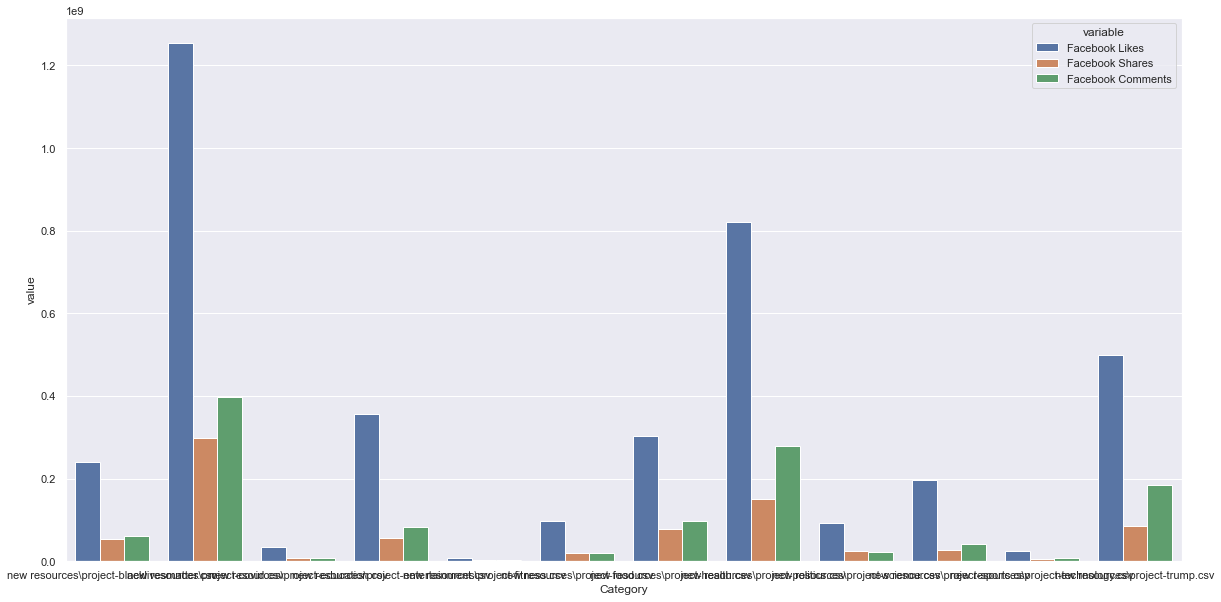

In [95]:
groupedby_categories = articles_df.groupby(['filename'])

#groupedby_categories.head()

facebook_likes = groupedby_categories['facebook_likes'].sum().sort_values(ascending=False)

facebook_shares = groupedby_categories['facebook_shares'].sum().sort_values(ascending=False)

facebook_comments = groupedby_categories['facebook_comments'].sum().sort_values(ascending=False)

print(facebook_likes)

print(facebook_shares)

print(facebook_comments)

#create dataframe of facebook stats by category
facebook_df = pd.DataFrame({'Facebook Likes' : facebook_likes,
                            'Facebook Shares' : facebook_shares,
                            'Facebook Comments' : facebook_comments,
                            }).reset_index()


facebook_df.columns = ['Category', 'Facebook Likes', 'Facebook Shares', 'Facebook Comments']

print(facebook_df.head(12))

#basic bar graph of category vs. facebook likes
#
#sns.barplot(x="Category", y="Facebook Comments", data=facebook_df, ci=None )
#plt.ylabel("Facebook Comments", size=14)
#plt.xlabel("Article Category", size=14)
#plt.title("Article Category vs. Facebook Likes Over the past 6 months", size=18)
#plt.savefig("barplot_Seaborn_barplot_Python.png")

#facebook likes plot code
#x_axis = np.arange(0, len(facebook_likes['index']))
#tick_locations = []
#for x in x_axis:
#    tick_locations.append(x)

#print(facebook_likes.plot(kind='bar'))

#code more multigroup bar graph
plt.figure(figsize=(20, 10))
sns.barplot(x='Category', y='value', hue='variable', 
           data=pd.melt(facebook_df, ['Category']))





#generate a bar graph of likes by category
#grouped_by_category_df = articles_df.groupby('filename')

#grouped_by_category_df.head(12)

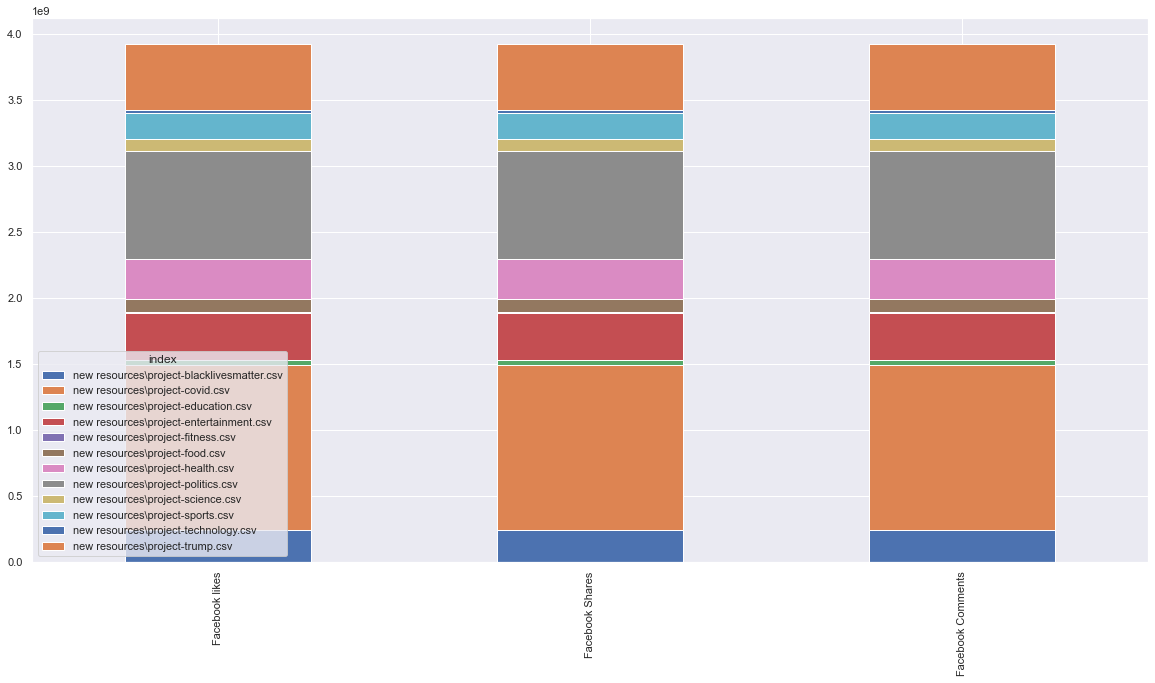

In [76]:
#create stacked bar graph based on dataframe using Seaborn
#sns.set()
#facebook_df.set_index('index').T.plot(kind='bar', stacked=True, figsize=(20,10))



In [47]:
#create stacked bar graph of emotional reactions based on category

wow_sum = groupedby_categories['wow_count'].sum().sort_values(ascending=False)

print(wow_count)

love_sum = groupedby_categories['love_count'].sum().sort_values(ascending=False)

print(love_count)

haha_sum = groupedby_categories['haha_count'].sum().sort_values(ascending=False)

print(haha_count)

sad_sum = groupedby_categories['sad_count'].sum().sort_values(ascending=False)

print(sad_count)

angry_sum = groupedby_categories['angry_count'].sum().sort_values(ascending=False)

print(angry_count)

emotions_df = pd.DataFrame({'Wow Sum' : wow_sum,
                            'Love Sum' : love_sum,
                            'Haha Sum' : haha_sum,
                            'Sad Sum' : sad_sum,
                            'Angry Sum' : angry_sum})

#reset_emotions_df = emotions_df.reset_index()

emotions_df.head(12)
#create pie charts of the emotional reactions of different categories

filename
new resources\project-covid.csv               9456586.0
new resources\project-politics.csv            6655031.0
new resources\project-trump.csv               4344283.0
new resources\project-health.csv              4321484.0
new resources\project-entertainment.csv       3990834.0
new resources\project-science.csv             2422037.0
new resources\project-sports.csv              1486289.0
new resources\project-blacklivesmatter.csv    1224709.0
new resources\project-food.csv                 749961.0
new resources\project-technology.csv           359575.0
new resources\project-education.csv            195399.0
new resources\project-fitness.csv               83925.0
Name: wow_count, dtype: float64
filename
new resources\project-entertainment.csv       20607178.0
new resources\project-politics.csv            20320150.0
new resources\project-covid.csv               16657359.0
new resources\project-trump.csv               14975942.0
new resources\project-sports.csv               737

,Wow Sum,Love Sum,Haha Sum,Sad Sum,Angry Sum
new resources\project-blacklivesmatter.csv,1224709.0,5082196.0,2781505.0,2987071.0,8754949.0
new resources\project-covid.csv,9456586.0,16657359.0,9275540.0,24336177.0,28916160.0
new resources\project-education.csv,195399.0,734315.0,265520.0,314057.0,897103.0
new resources\project-entertainment.csv,3990834.0,20607178.0,7134327.0,11633400.0,5956044.0
new resources\project-fitness.csv,83925.0,280701.0,107571.0,58212.0,52501.0
new resources\project-food.csv,749961.0,3672314.0,594441.0,1336710.0,1839608.0
new resources\project-health.csv,4321484.0,5838537.0,3180835.0,9457604.0,9030715.0
new resources\project-politics.csv,6655031.0,20320150.0,19278574.0,8963698.0,54021028.0
new resources\project-science.csv,2422037.0,2478427.0,1220816.0,2353439.0,2114605.0
new resources\project-sports.csv,1486289.0,7378318.0,3565816.0,6964297.0,3235828.0


In [92]:
#create stacked bar graph based on dataframe using Seaborn
#sns.set()
#reset_emotions_df.set_index('').T.plot(kind='bar', stacked=True)

#emotions_df.set_index('index')\
#  .reindex(emotions_df.set_index('index').sum().sort_values().index, axis=1)\
#  .T.plot(kind='bar', stacked=True,
#          colormap=ListedColormap(sns.color_palette("GnBu", 10)), 
#          figsize=(12,6))


#emotions_df.size().unstack().plot(kind = 'bar', stacked=True)

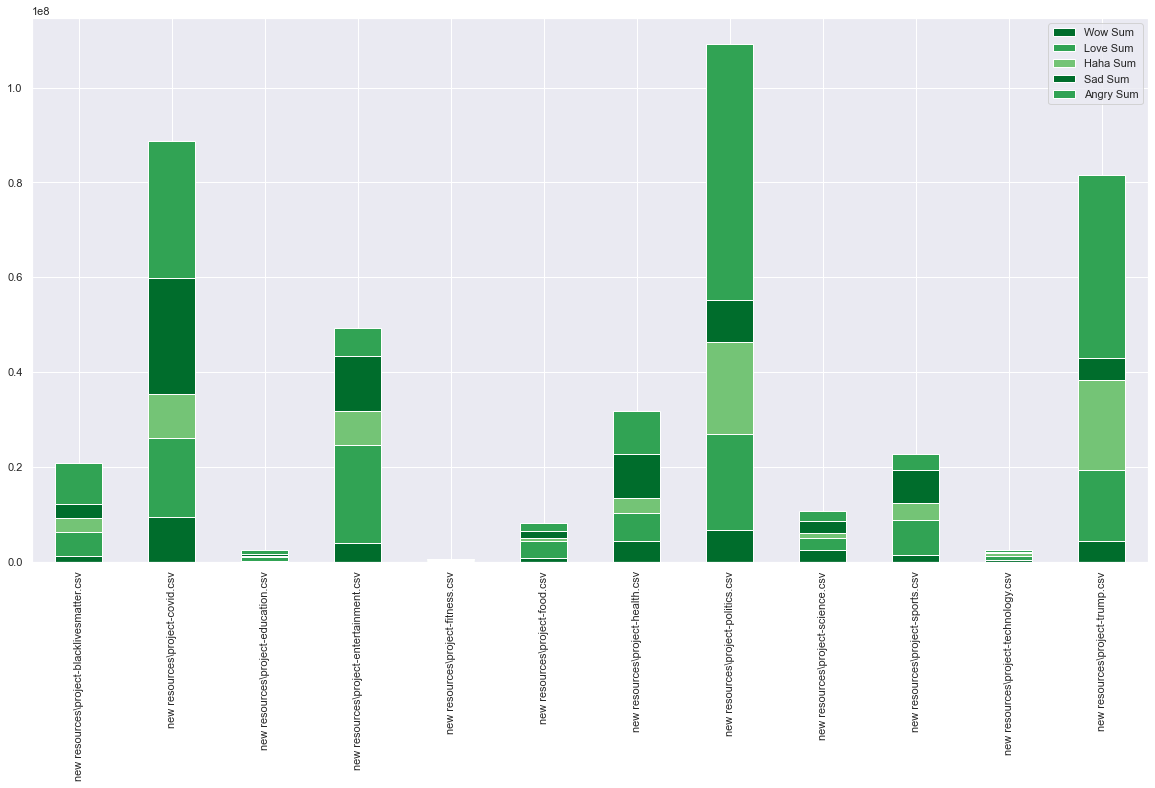

In [93]:
colors = ["#006D2C", "#31A354","#74C476"]

#xl = ['Black Lives Matter', 'Covid', 'Education', 'Entertainment', 'Fitness', 'Food', 'Health', 'Politics', 'Science', 'Sports', 'Technology', 'Trump'] 

#stacked bar graph on the other axis
emotions_df.plot.bar(stacked=True, color=colors, figsize=(20,10))

#plt.xticks(xl)

plt.show()

In [51]:
#isolate political articles
politics_df = articles_df.loc[articles_df['filename'] == 'new resources\project-politics.csv']

politics_df

,title,url,evergreen_score,total_facebook_shares,facebook_comments,facebook_shares,facebook_likes,wow_count,love_count,haha_count,sad_count,angry_count,filename
69957,D.C. Mayor Bowser has 'Black Lives Matter' pai...,https://www.nbcnews.com/politics/politics-news...,2.639445,13300726,1264636,1389988,10646102,6253.0,124745.0,4425.0,865.0,7038.0,new resources\project-politics.csv
69958,"In landmark case, Supreme Court rules LGBTQ wo...",https://www.nbcnews.com/politics/supreme-court...,3.401409,10157818,568587,714406,8874825,184.0,23418.0,56.0,28.0,58.0,new resources\project-politics.csv
69959,Supreme Court blocks Trump from ending DACA in...,https://www.nbcnews.com/politics/supreme-court...,2.901561,7651645,397882,772396,6481367,40.0,4954.0,32.0,36.0,216.0,new resources\project-politics.csv
69960,James Mattis Denounces Trump as Threat to Cons...,https://www.theatlantic.com/politics/archive/2...,33.958258,6780881,1161407,740896,4878578,5437.0,22908.0,1891.0,3090.0,3295.0,new resources\project-politics.csv
69961,Trump suggests 'injection' of disinfectant to ...,https://www.nbcnews.com/politics/donald-trump/...,38.052367,6473215,3389404,441344,2642467,13161.0,475.0,23263.0,3805.0,22436.0,new resources\project-politics.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79952,Poll: 90 Percent of Evangelicals Back Donald T...,https://www.breitbart.com/politics/2020/07/13/...,0.188967,27709,2403,1744,23562,98.0,2605.0,57.0,7.0,23.0,new resources\project-politics.csv
79953,Roger Stone denied new trial and gag order lifted,https://www.cnn.com/2020/04/16/politics/roger-...,7.012289,25365,4676,2999,17690,36.0,928.0,1290.0,8.0,78.0,new resources\project-politics.csv
79954,NSC aide handling book approvals is twin broth...,https://www.washingtontimes.com/news/2020/jan/...,6.665051,27309,6243,5996,15070,183.0,3.0,36.0,14.0,729.0,new resources\project-politics.csv
79955,Tammy Duckworth bursts into VP contention,https://www.politico.com/news/2020/07/12/tammy...,0.725390,27191,5892,2747,18552,71.0,1673.0,287.0,13.0,134.0,new resources\project-politics.csv


C:\Users\kickboxerva\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


The r-squared is: nan


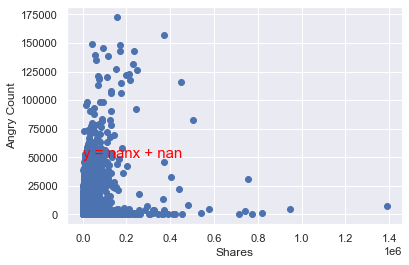

In [57]:
#attempt at liner regression
#scatter plot of shares vs. anger_count
title = 'Facebook shares vs. Angry Reaction for Political Articles'

#linear regression
x_values = politics_df['facebook_shares']
y_values = politics_df['angry_count']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.8, 50000),fontsize=15,color="red")


#politics_df.plot(kind="scatter", x="total_facebook_shares", y="angry_count", grid=True, figsize=(8,8),
#                  title= title)
plt.xlabel('Shares')
plt.ylabel('Angry Count')
print(f"The r-squared is: {rvalue**2}")
#plt.savefig('maxtemp_vs_lat.png', dpi=300, bbox_inches = 'tight')
plt.show()